In [26]:
# Libraries
from waveome.model_search import GPKernelSearch
import pandas as pd

In [27]:
# Read data in
df = pd.read_excel("newdata.xlsx")

PermissionError: [Errno 13] Permission denied: 'newdata.xlsx'

In [ ]:
pip install openpyxl

In [ ]:
# Need to recode categorical as numeric for search
df["Breast milk collected"], bmc_values = pd.factorize(df["Breast milk collected"])

In [ ]:
# Specify covariates
covariate_list = [
    "individual_id", "age stool sample", 
    "birth weight", "Age at breast milk sample", 
    "Gestational by weight percentagete",
    "Breast milk collected"
]

In [ ]:
column_names = df.columns.tolist()
print(column_names[7:11])
df[column_names[7:11]] = df[column_names[7:11]].astype(float)
Y = df[column_names[7:11]]
Y.head()

In [ ]:
# Load up search object
gps = GPKernelSearch(
    X=df[covariate_list].astype(float),
    Y=df[column_names[7:11]],
    unit_col="individual_id",
    categorical_vars=["Breast milk collected"],
    outcome_likelihood='gaussian'
)

In [ ]:
# Run search (takes ~4mins)
gps.run_search(random_seed=1)

Kernel search: 100%|██████████| 3/3 [20:22<00:00, 407.57s/it]


(<Figure size 2000x500 with 4 Axes>,
 array([<Axes: title={'center': 'categorical[individual_id]*squared_exponential[Age at breast milk sample] (27.1%)'}, xlabel='Age at breast milk sample'>,
        <Axes: title={'center': 'categorical[individual_id]*squared_exponential[Gestational by weight percentagete] (26.2%)'}, xlabel='Age at breast milk sample'>,
        <Axes: title={'center': 'squared_exponential[Age at breast milk sample] (39.6%)'}, xlabel='Age at breast milk sample'>,
        <Axes: title={'center': 'residuals (7.2%)'}, xlabel='Age at breast milk sample'>],
       dtype=object))

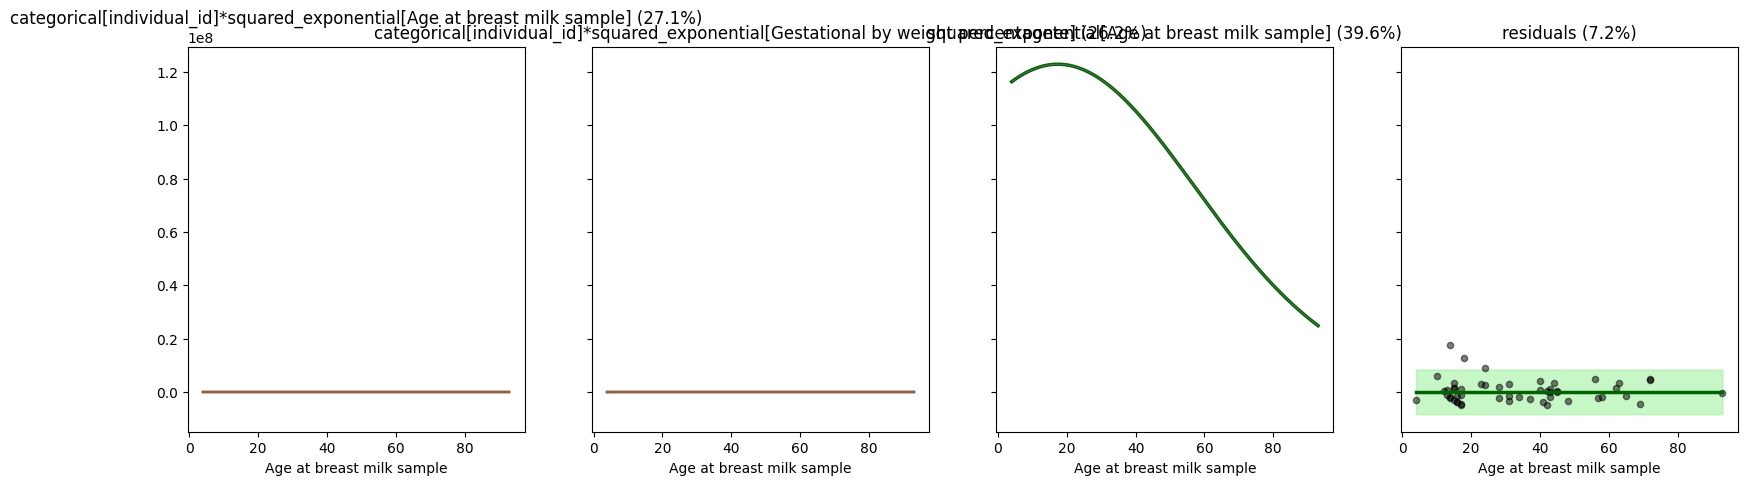

In [28]:
gps.plot_parts(
    out_label='(14 or 15)-methylpalmitate (a17:0 or i17:0)',
    x_axis_label='Age at breast milk sample')

(<Figure size 2500x500 with 5 Axes>,
 array([<Axes: title={'center': 'categorical[individual_id] (26.0%)'}, xlabel='Age at breast milk sample'>,
        <Axes: title={'center': 'categorical[individual_id]*squared_exponential[age stool sample] (23.4%)'}, xlabel='Age at breast milk sample'>,
        <Axes: title={'center': 'squared_exponential[Age at breast milk sample] (23.9%)'}, xlabel='Age at breast milk sample'>,
        <Axes: title={'center': 'squared_exponential[Gestational by weight percentagete] (23.3%)'}, xlabel='Gestational by weight percentagete'>,
        <Axes: title={'center': 'residuals (3.3%)'}, xlabel='Age at breast milk sample'>],
       dtype=object))

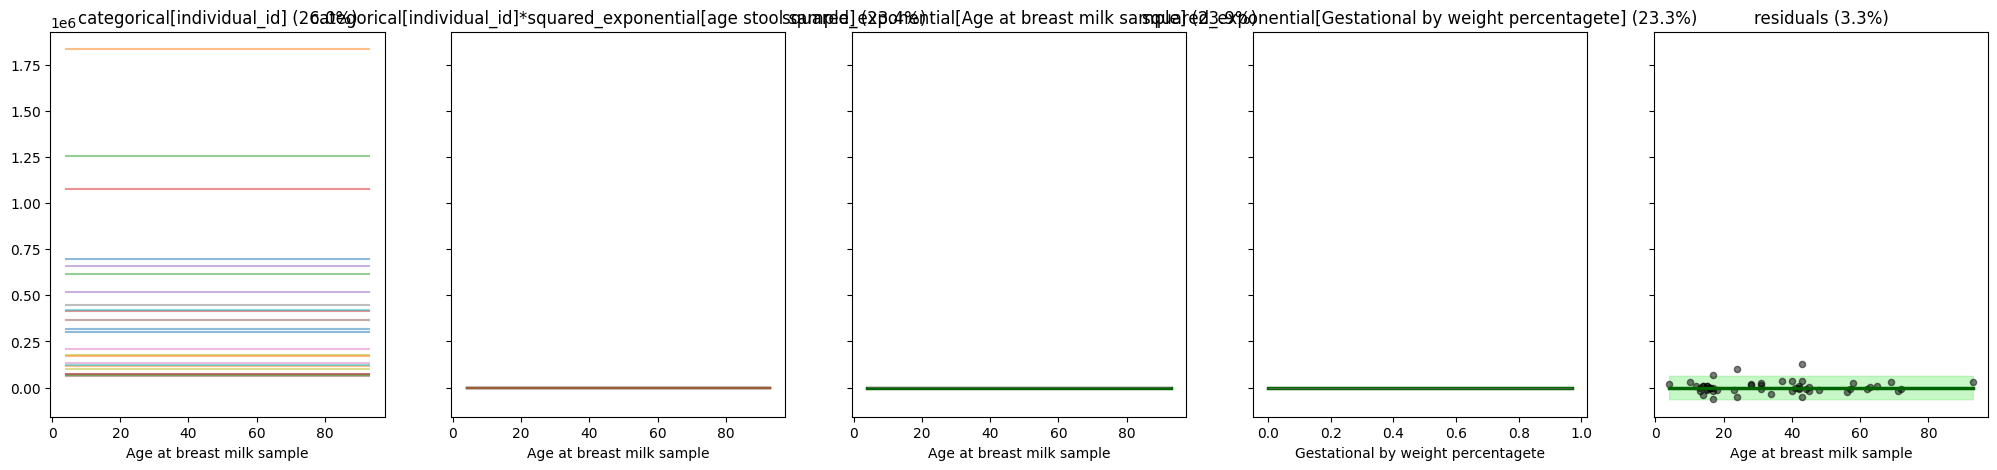

In [29]:
gps.plot_parts(
    out_label='(S)-3-hydroxybutyrylcarnitine',
    x_axis_label='Age at breast milk sample')

(<Figure size 2500x500 with 5 Axes>,
 array([<Axes: title={'center': 'categorical[individual_id] (26.8%)'}, xlabel='Age at breast milk sample'>,
        <Axes: title={'center': 'squared_exponential[Age at breast milk sample] (24.2%)'}, xlabel='Age at breast milk sample'>,
        <Axes: title={'center': 'squared_exponential[age stool sample] (25.8%)'}, xlabel='age stool sample'>,
        <Axes: title={'center': 'squared_exponential[Gestational by weight percentagete] (19.1%)'}, xlabel='Gestational by weight percentagete'>,
        <Axes: title={'center': 'residuals (4.2%)'}, xlabel='Age at breast milk sample'>],
       dtype=object))

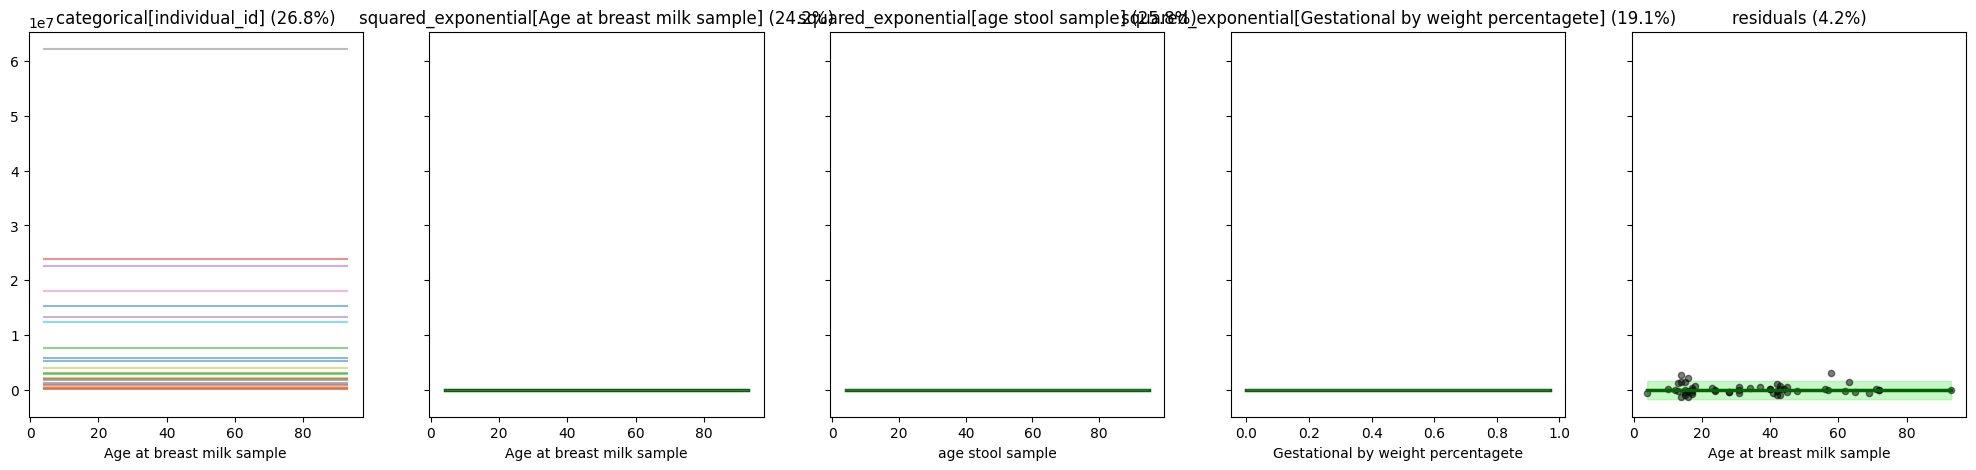

In [30]:
gps.plot_parts(
    out_label='1,3-propanediol',
    x_axis_label='Age at breast milk sample')

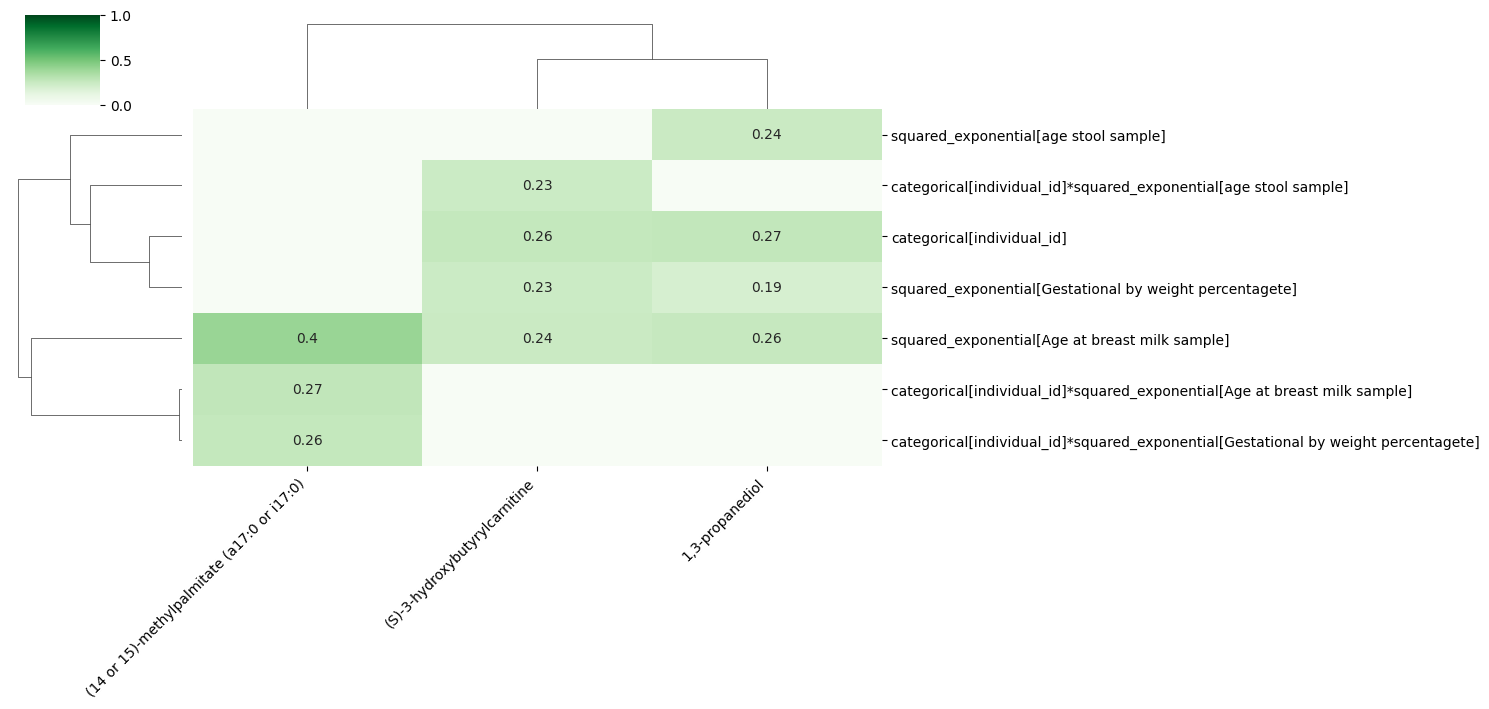

In [31]:
# Check out high level results
gps.plot_heatmap()